In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_pheno = '/Users/harveyaa/Documents/masters/data/pheno_26-01-22.csv'
pheno = pd.read_csv(path_pheno,index_col=0)

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_81321/3622504503.py:2: DtypeWarning: Columns (7,8,12,13,14,19,20,24,27,31,42,43,44,49,51,59,60,62,64,65,68,101,121,163) have mixed types. Specify dtype option on import or set low_memory=False.
  pheno = pd.read_csv(path_pheno,index_col=0)


In [3]:
path_conn = '/Users/harveyaa/Documents/masters/data/connectomes/connectome_{}_cambridge64.npy'
connectomes = []
for idx in pheno.index:
    connectomes.append(np.load(path_conn.format(idx)))

In [10]:
mean_conn = pd.DataFrame(np.mean(connectomes,axis=(0)))

<AxesSubplot: >

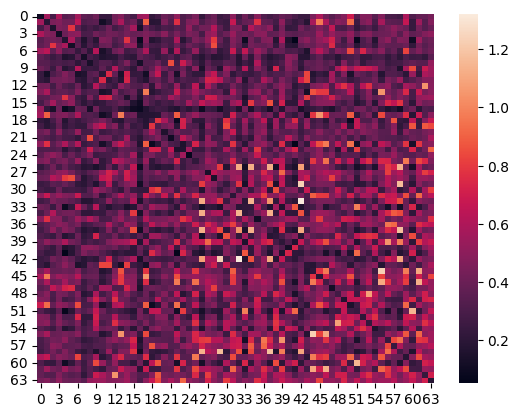

In [11]:
sns.heatmap(mean_conn)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [102.5, 102.5, 140.0, 140.0],
  [80.0, 80.0, 121.25, 121.25],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [172.5, 172.5, 200.0, 200.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [186.25, 186.25, 223.75, 223.75],
  [100.625, 100.625, 205.0, 205.0],
  [25.625, 25.625, 152.8125, 152.8125],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [263.75, 263.75, 310.0, 310.0],
  [365.0, 

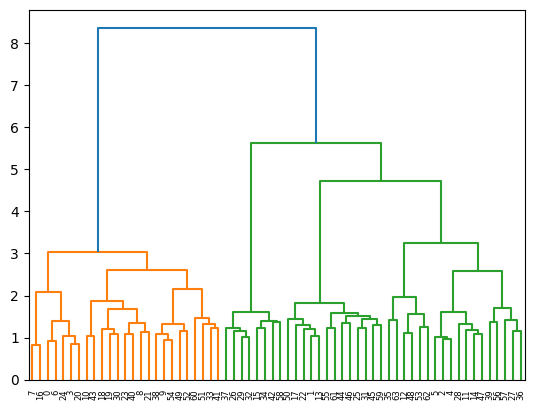

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
#from scipy.spatial.distance import squareform


Z = linkage(mean_conn, 'ward')

dendrogram(Z, orientation='top', 
           leaf_rotation=90)

#from sklearn.cluster import AgglomerativeClustering

#cluster = AgglomerativeClustering(linkage='ward',n_clusters=3)
#clustering = cluster.fit(mean_conn)

In [13]:
# Clusterize the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([ 3, 34, 53,  5, 54, 55,  4,  1, 15, 17,  8, 58, 49, 35, 56, 30,  2,
       37, 12, 10,  6, 16, 36, 13,  7, 43, 28, 62, 59, 26, 11, 44, 27, 22,
       31, 47, 63, 29, 19, 60, 14, 23, 32,  9, 41, 45, 42, 57, 50, 20, 38,
       24, 21, 51, 18, 39, 61, 64, 33, 46, 25, 40, 52, 48], dtype=int32)

In [18]:
# Keep the indices to sort labels
labels_order = np.argsort(labels)

,7,16,0,6,3,20,24,10,43,19,...,5,14,47,11,28,39,56,27,36,57
7,0.125473,0.369351,0.360696,0.331302,0.297065,0.278732,0.371319,0.164535,0.185436,0.227752,...,0.190007,0.223893,0.262737,0.187526,0.183569,0.252695,0.216543,0.275424,0.256547,0.288309
16,0.369351,0.091637,0.536653,0.387862,0.400799,0.253959,0.196005,0.239614,0.213867,0.269198,...,0.153289,0.165720,0.155204,0.239342,0.232139,0.172999,0.158232,0.252643,0.227423,0.197239
0,0.360696,0.536653,0.105411,0.558625,0.597459,0.398735,0.358451,0.239847,0.250710,0.271364,...,0.363321,0.344114,0.340683,0.235338,0.395748,0.383538,0.295802,0.343958,0.317767,0.292601
6,0.331302,0.387862,0.558625,0.234447,0.506425,0.525246,0.307190,0.141641,0.155592,0.229764,...,0.352673,0.270229,0.316842,0.213097,0.399104,0.383725,0.320366,0.321788,0.441791,0.382485
3,0.297065,0.400799,0.597459,0.506425,0.111896,0.490748,0.453573,0.368513,0.394634,0.379525,...,0.485921,0.433232,0.532729,0.423766,0.547725,0.459522,0.411295,0.500036,0.495474,0.468829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,0.252695,0.172999,0.383538,0.383725,0.459522,0.343274,0.464544,0.318819,0.364673,0.289308,...,0.429203,0.571157,0.530266,0.459154,0.627754,0.202174,1.042771,0.921631,0.691021,0.576318
56,0.216543,0.158232,0.295802,0.320366,0.411295,0.344385,0.427320,0.327545,0.382082,0.356656,...,0.366303,0.520987,0.516453,0.452979,0.622657,1.042771,0.236602,0.809621,0.958706,0.834957
27,0.275424,0.252643,0.343958,0.321788,0.500036,0.378320,0.473492,0.532185,0.548541,0.502063,...,0.431830,0.703472,0.567500,0.718498,0.645951,0.921631,0.809621,0.137340,0.732456,0.551190
36,0.256547,0.227423,0.317767,0.441791,0.495474,0.529681,0.389835,0.377292,0.497659,0.477539,...,0.382861,0.552232,0.522107,0.594632,0.596154,0.691021,0.958706,0.732456,0.324649,0.920194


<AxesSubplot: >

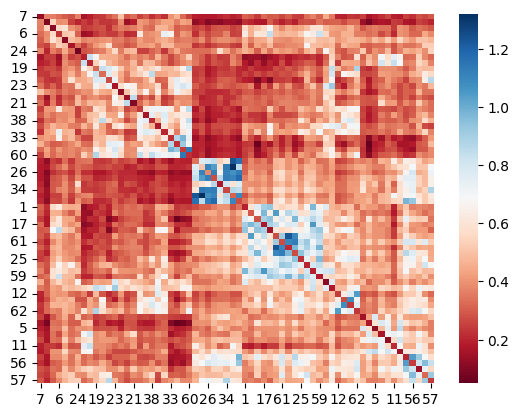

In [19]:
sns.heatmap(round(mean_conn[labels_order].loc[labels_order],2), cmap='RdBu')